# Case Study 5.1 - 03 KeyBERT for Topic: "Student Experience"

In this script we apply KeyBERT to a subset of the data; focusing on just those essays in the "Student Experience" topic.
In addition we split the Keyword generation between the two sources of essays: Human and AI.
The goal is to create a Venn diagram that illustrates the word choice differences between the two sources of essays.

The original scripts for the content of this Notebook can be found here:
* [CaseStudy_5.1_03-01.py](CaseStudy_5.1_03-01.py)
* [CaseStudy_5.1_03-02.py](CaseStudy_5.1_03-02.py)

In [ ]:
from keybert import KeyBERT
from collections import Counter
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("data/clustered_data.csv")

test = df[df["cluster"]==0]
test = test[test["RANDOM"]>=0.8]

test_ai = test[test["generated"]==1]
test_human = test[test["generated"]==0]

text_ai = test_ai['text'].tolist()
text_human = test_human['text'].tolist()

In [ ]:
model_name = 'bert-base-uncased'
kw_model = KeyBERT(model=model_name)

def extract_keywords(texts, top_n=3):
    all_keywords = []
    for text in tqdm(texts, desc="Extracting keywords"):
        keywords = kw_model.extract_keywords(text, top_n=top_n, stop_words='english')
        all_keywords.extend([kw[0] for kw in keywords])
    return Counter(all_keywords)


## 01 Extract the Keywords for AI and Human Essays

In [ ]:
with np.errstate(divide='ignore', invalid='ignore', over='ignore'):
    keywds_ai = extract_keywords(text_ai, top_n=3)

In [ ]:
with np.errstate(divide='ignore', invalid='ignore', over='ignore'): 
    keywds_human = extract_keywords(text_human, top_n=3)

In [ ]:
ai_keywords = pd.DataFrame({"keywords": pd.Series(keywds_ai)}).fillna(0).astype(int).reset_index()
ai_keywords.columns=['keyword','count']
ai_keywords = ai_keywords[ai_keywords['count']>=15]
ai_keywords.to_csv("data/ai_keywords.csv", index=False)

In [ ]:
hu_keywords = pd.DataFrame({"keywords": pd.Series(keywds_human)}).fillna(0).astype(int).reset_index()
hu_keywords.columns=['keyword','count']
hu_keywords = hu_keywords[hu_keywords['count']>=45]
hu_keywords.to_csv("data/human_keywords.csv", index=False)

## 02 - Visualise in Venn Diagram

In [ ]:
from matplotlib_venn import venn2
from matplotlib import pyplot as plt

In [ ]:
hu_keywords = pd.read_csv("data/human_keywords.csv")
ai_keywords = pd.read_csv("data/ai_keywords.csv")

In [ ]:
# Define your sets of keywords
set_ai = set(ai_keywords['keyword'].to_list())
set_human = set(hu_keywords['keyword'].to_list())

ai_only = (set_ai - set_human)
human_only = (set_human - set_ai)
both_sets = (set_ai & set_human)

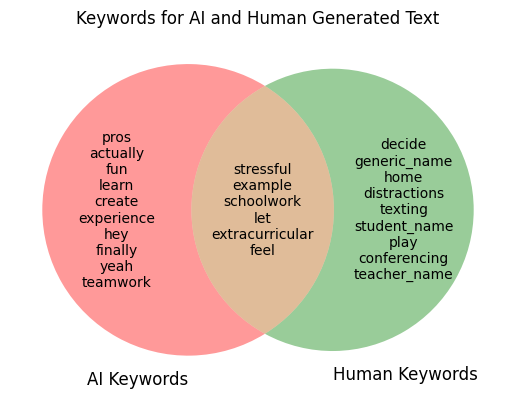

In [7]:
v = venn2(subsets=(len(ai_only), len(human_only), len(both_sets)),
      set_labels=('AI Keywords', 'Human Keywords'))

# Modify the content of the circles to make it legible

if v.get_label_by_id('10'):
    v.get_label_by_id('10').set_text("\n".join(ai_only))

if v.get_label_by_id('01'):
    v.get_label_by_id('01').set_text("\n".join(human_only))

if v.get_label_by_id('11'):
    v.get_label_by_id('11').set_text("\n".join(both_sets))

# Display the plot
plt.title("Keywords for AI and Human Generated Text")
plt.show()